<a href="https://colab.research.google.com/github/adrita23/Facial_Emotion_Recognition-FER-/blob/main/FacialEmotionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Date: November 12, 2021
#Author: Adrita Anika

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
from PIL import Image 
from google.colab.patches import cv2_imshow
import cv2
import random
import numpy as np

In [ ]:
#import data
import pandas as pd
import numpy as np
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HW3Files/Q1_Train_Data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HW3Files/Q1_Test_Data.csv")
valid_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HW3Files/Q1_Validation_Data.csv")

In [ ]:
#calculate the number of samples per class
Emotion_dict =  {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
Emotions_Labels = train_data.iloc[:,0]
Angry_no, Disgust_no, Fear_no, Happy_no, Sad_no, Surprise_no, Neutral_no = 0,0,0,0,0,0,0
Angry_idx, Disgust_idx, Fear_idx, Happy_idx, Sad_idx, Surprise_idx, Neutral_idx = [], [], [], [], [], [],[]

for idx, i in enumerate(Emotions_Labels):
 if i==0:
   Angry_no +=1
   Angry_idx.append(idx)
 elif i==1:
   Disgust_no +=1
   Disgust_idx.append(idx)
 elif i==2:
   Fear_no +=1
   Fear_idx.append(idx)
 elif i==3:
   Happy_no +=1
   Happy_idx.append(idx)
 elif i==4:
   Sad_no +=1
   Sad_idx.append(idx)
 elif i==5:
   Surprise_no +=1
   Surprise_idx.append(idx)
 elif i==6:
   Neutral_no +=1
   Neutral_idx.append(idx)


Angry


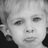

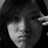

Disgust


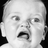

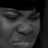

Fear


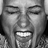

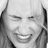

Happy


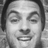

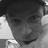

Surprise


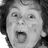

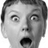

Neutral


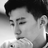

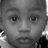

(None, None, None)

time: 138 ms (started: 2021-11-15 00:17:45 +00:00)


In [7]:
#data visualization
random_angry, random_disgust, random_fear, random_happy, random_surprise, random_neutral  = random.sample(Angry_idx,2), random.sample(Disgust_idx,2), random.sample(Fear_idx,2), random.sample(Happy_idx,2), random.sample(Surprise_idx,2), random.sample(Neutral_idx,2)  

def myshow(indx):
  data = list(map(int, train_data.loc[indx][1].split()))
  data = np.array(data).reshape(48,48)
  #print(data)
  #data_p = Image.fromarray((data).astype(np.uint8)
  #cv2.namedWindow("output", cv2.WINDOW_NORMAL)
  cv2_imshow(data)
  #cv2.resize(data, (960, 540)) 

print("Angry"), myshow(random_angry[0]), myshow(random_angry[1])
print("Disgust"),myshow(random_disgust[0]), myshow(random_disgust[1])
print("Fear"), myshow(random_fear[0]), myshow(random_fear[1])
print("Happy"), myshow(random_happy[0]), myshow(random_happy[1])
print("Surprise"), myshow(random_surprise[0]), myshow(random_surprise[1])
print("Neutral"), myshow(random_neutral[0]), myshow(random_neutral[1])



**a.** There are 7 emotions. Randomly 2 images from every emotion is shown.

---



In [8]:
#data exploaration
print("The number of samples per emotion is: ")
print("Angry: ", Angry_no, "\nDisgust: ", Disgust_no, "\nFear: ", Fear_no, "\nHappy: ", Happy_no, "\nSurprise: ", Surprise_no, "\nNeutral: ", Neutral_no)

The number of samples per emotion is: 
Angry:  3995 
Disgust:  436 
Fear:  4097 
Happy:  7215 
Surprise:  3171 
Neutral:  4965
time: 8.99 ms (started: 2021-11-15 00:17:49 +00:00)


**b.** The number of samples per emotion is calculated in the above cell.

In [ ]:
from tensorflow.keras.utils import to_categorical
#Prepare the data
def data_extract(img_index_1):
  img_vals = list((map(int, img_index_1.split())))
  return np.array(img_vals)
#print(data_extract(train_data.loc[2][1]))

#train data
X_train_label = to_categorical(Emotions_Labels)
X_train = np.zeros((len(X_train_label), 2304))
for idx, val in enumerate(train_data.iloc[:,1]):
  X_train[idx] = data_extract(val)

#validation data
X_valid_label  = to_categorical(valid_data.iloc[:,0])
X_valid = np.zeros((len(X_valid_label), 2304))
for idx, val in enumerate(valid_data.iloc[:,1]):
  X_valid[idx] = data_extract(val)

#test data
X_test_label = to_categorical(test_data.iloc[:,0])
X_test = np.zeros((len(X_test_label), 2304))
for idx, val in enumerate(test_data.iloc[:,1]):
  X_test[idx] = data_extract(val)

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.hdf5", monitor = 'val_loss', verbose = 1,
    save_best_only = True, mode =' min', period = 1)

In [ ]:
# Preprocessing: Normalize the images.
X_train = (X_train / 255) - 0.5
X_valid = (X_valid/ 255) - 0.5
X_test = (X_test/ 255) - 0.5


Epoch 00001: val_loss improved from inf to 1.62339, saving model to best_model.hdf5

Epoch 00002: val_loss improved from 1.62339 to 1.55201, saving model to best_model.hdf5

Epoch 00003: val_loss improved from 1.55201 to 1.52754, saving model to best_model.hdf5

Epoch 00004: val_loss did not improve from 1.52754

Epoch 00005: val_loss improved from 1.52754 to 1.51851, saving model to best_model.hdf5

Epoch 00006: val_loss improved from 1.51851 to 1.49495, saving model to best_model.hdf5

Epoch 00007: val_loss did not improve from 1.49495

Epoch 00008: val_loss did not improve from 1.49495

Epoch 00009: val_loss did not improve from 1.49495

Epoch 00010: val_loss did not improve from 1.49495
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               1180160   
                                                                 
 dense_21 (De

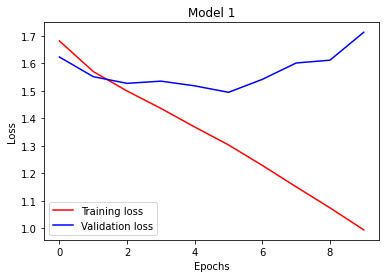

time: 42 s (started: 2021-11-15 00:50:37 +00:00)


In [35]:
#FNN

n_feats = 48*48 #image size 48 *48
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

#Moedl1: 4 layers, optimozer = adam, without dropout
model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(n_feats,)))
#model.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(7, activation = 'softmax'))
model1.compile(
    optimizer=Adam(learning_rate= 0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

train_model1 = model1.fit(X_train, X_train_label, validation_data=(X_valid, X_valid_label),callbacks = [checkpoint], epochs=10, verbose=0)
model1.summary()

#model.history.history
train_loss1 = train_model1.history['loss']
valid_loss1 = train_model1.history['val_loss']
import matplotlib.pyplot as plt
plt.plot(train_loss1, 'r', label='Training loss')
plt.plot(valid_loss1, 'b', label='Validation loss')
plt.title('Model 1') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
import keras
best_model = keras.models.load_model("best_model.hdf5")
score = best_model.evaluate(X_train, X_train_label, verbose=0)
score1 = best_model.evaluate(X_valid, X_valid_label, verbose=0)
print("Accuracy on Training Set", score[1], "\nAccuracy on Validation Set", score1[1])

Accuracy on Training Set 0.4921453297138214 
Accuracy on Validation Set 0.41571468114852905
time: 3.48 s (started: 2021-11-15 00:49:54 +00:00)


FNN Model -1:

*   Accuracy on the training dataset: 52%
*   Accuracy on the validation dataset:42%
*   Running time: 1min 23s
*   Parameters: 4 layers, optimozer = adam, without dropout, without regularization
* The best model has been saved while training by monitoring the validation loss and the loss curve is plotted above. 





In [ ]:
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor = 'val_loss', verbose = 1,
    save_best_only = True, mode =' min', period = 1)


Epoch 1/10
897/898 [============================>.] - ETA: 0s - loss: 2.3355 - accuracy: 0.2789
Epoch 00001: val_loss improved from inf to 1.79051, saving model to best_model2.hdf5
898/898 [==============================] - 7s 6ms/step - loss: 2.3354 - accuracy: 0.2790 - val_loss: 1.7905 - val_accuracy: 0.3132
Epoch 2/10
895/898 [============================>.] - ETA: 0s - loss: 1.7951 - accuracy: 0.3130
Epoch 00002: val_loss improved from 1.79051 to 1.76418, saving model to best_model2.hdf5
898/898 [==============================] - 6s 6ms/step - loss: 1.7951 - accuracy: 0.3131 - val_loss: 1.7642 - val_accuracy: 0.3355
Epoch 3/10
890/898 [============================>.] - ETA: 0s - loss: 1.7643 - accuracy: 0.3220
Epoch 00003: val_loss improved from 1.76418 to 1.73603, saving model to best_model2.hdf5
898/898 [==============================] - 6s 6ms/step - loss: 1.7644 - accuracy: 0.3218 - val_loss: 1.7360 - val_accuracy: 0.3494
Epoch 4/10
892/898 [============================>.] - ET

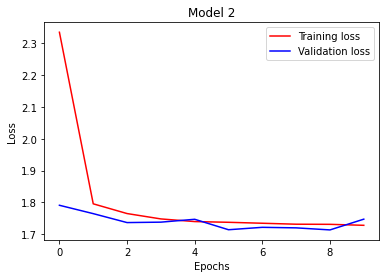

time: 57 s (started: 2021-11-14 21:59:12 +00:00)


In [42]:
#Model 2: 5 layers, optimizer = "adam", without dropout
from keras.regularizers import l2 
model2 = Sequential()
model2.add(Dense(512,kernel_regularizer=l2(0.01), activation='relu', input_shape=(n_feats,)))
model2.add(Dense(256,kernel_regularizer=l2(0.01), activation='relu'))
model2.add(Dense(64,kernel_regularizer=l2(0.01), activation='relu'))
model2.add(Dense(32,kernel_regularizer=l2(0.01), activation='relu'))
model2.add(Dense(7, activation = 'softmax'))
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
train_model2 = model2.fit(X_train, X_train_label, validation_data=(X_valid, X_valid_label),callbacks = [checkpoint2],  epochs=10, verbose=0)
model2.summary()
train_loss2 = train_model2.history['loss']
valid_loss2 = train_model2.history['val_loss']
plt.plot(train_loss2, 'r', label='Training loss')
plt.plot(valid_loss2, 'b', label='Validation loss')
plt.title('Model 2') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
best_model2 = keras.models.load_model("best_model2.hdf5")
score = best_model2.evaluate(X_train, X_train_label, verbose=0)
score1 = best_model2.evaluate(X_valid, X_valid_label, verbose=0)
print("Accuracy on Training Set", score[1], "\nAccuracy on Validation Set", score1[1])

FNN Model -2:

*   Accuracy on the training dataset: 34%
*   Accuracy on the validation dataset:34%
*   Running time: 57s
*   Parameters: 5 layers, optimizer = "adam", without dropout, with regularization
* The best model has been saved while training by monitoring the validation loss and the loss curve is plotted above. 





In [44]:
checkpoint3 = ModelCheckpoint("best_model3.hdf5", monitor = 'val_loss', verbose = 1,
    save_best_only = True, mode =' min', period = 1)


time: 9.37 ms (started: 2021-11-14 22:01:55 +00:00)


Epoch 1/10
895/898 [============================>.] - ETA: 0s - loss: 1.7477 - accuracy: 0.3001
Epoch 00001: val_loss improved from inf to 1.66410, saving model to best_model3.hdf5
898/898 [==============================] - 7s 7ms/step - loss: 1.7472 - accuracy: 0.3005 - val_loss: 1.6641 - val_accuracy: 0.3377
Epoch 2/10
894/898 [============================>.] - ETA: 0s - loss: 1.6426 - accuracy: 0.3597
Epoch 00002: val_loss improved from 1.66410 to 1.58756, saving model to best_model3.hdf5
898/898 [==============================] - 6s 7ms/step - loss: 1.6425 - accuracy: 0.3599 - val_loss: 1.5876 - val_accuracy: 0.3775
Epoch 3/10
895/898 [============================>.] - ETA: 0s - loss: 1.5850 - accuracy: 0.3869
Epoch 00003: val_loss improved from 1.58756 to 1.55560, saving model to best_model3.hdf5
898/898 [==============================] - 6s 7ms/step - loss: 1.5848 - accuracy: 0.3868 - val_loss: 1.5556 - val_accuracy: 0.4057
Epoch 4/10
894/898 [============================>.] - ET

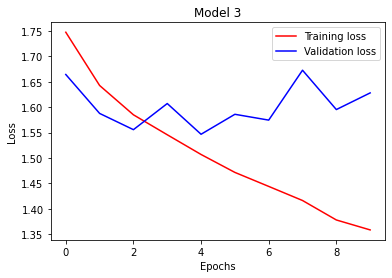

time: 1min 3s (started: 2021-11-14 22:01:57 +00:00)


In [45]:
#Model 3: 5 layers, optimizer = "rmsprop", with dropout, without regularization
model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(n_feats,)))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(7, activation = 'softmax'))
model3.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
train_model3 = model3.fit(X_train, X_train_label, validation_data=(X_valid, X_valid_label),callbacks = [checkpoint3],  epochs=10, verbose=0)

model3.summary()
train_loss3 = train_model3.history['loss']
valid_loss3 = train_model3.history['val_loss']
plt.plot(train_loss3, 'r', label='Training loss')
plt.plot(valid_loss3, 'b', label='Validation loss')
plt.title('Model 3') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
best_model3 = keras.models.load_model("best_model3.hdf5")
score = best_model3.evaluate(X_train, X_train_label, verbose=0)
score1 = best_model3.evaluate(X_valid, X_valid_label, verbose=0)
print("Accuracy on Training Set", score[1], "\nAccuracy on Validation Set", score1[1])

Accuracy on Training Set 0.4583580195903778 
Accuracy on Validation Set 0.41237112879753113
time: 6.01 s (started: 2021-11-14 22:04:34 +00:00)


FNN Model -3:

*   Accuracy on the training dataset: 45%
*   Accuracy on the validation dataset:41%
*   Running time: 1min 3s
*   Parameters: 5 layers, optimizer = "rmsprop", with dropout, without regularization
* The best model has been saved while training by monitoring the validation loss and the loss curve is plotted above. 





In [49]:
#Testing FNN
# Evaluate your model's performance on the test data
performance = best_model3.evaluate(X_test, X_test_label, verbose=0)
print("Accuracy on Testing Set:",  performance[1])

Accuracy on Testing Set: 0.42268040776252747
time: 450 ms (started: 2021-11-14 22:07:41 +00:00)


**c.iii.** Model 3 gives the best performance among the three models. So we chooe odel 3 for testing and the accuracy is 42%

In [14]:
#CNN
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import batch_normalization
from keras.models import Model
#cnn model 1: 3 convolution layers, 2 max pooling layers, optimizer: adam, without dropout, without regularization
cnn_model = Sequential([Conv2D(96, kernel_size=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), 
            Flatten(),Dense(512, activation='relu'), Dense(7, activation='softmax'),])

time: 82.3 ms (started: 2021-11-15 00:19:32 +00:00)


In [47]:
train_images_cnn = X_train.reshape(28709,48,48,1)
valid_images_cnn = X_valid.reshape(3589,48,48, 1)
test_images_cnn = X_test.reshape(3589,48,48,1)
print(train_images_cnn.shape, X_train_label.shape, valid_images_cnn.shape, X_valid_label.shape)

(28709, 48, 48, 1) (28709, 7) (3589, 48, 48, 1) (3589, 7)
time: 3.31 ms (started: 2021-11-15 01:27:11 +00:00)


In [67]:
checkpoint_cnn1 = ModelCheckpoint("best_model_cnn1.hdf5", monitor = 'val_loss', verbose = 1,
    save_best_only = True, mode =' min', period = 1)

time: 9.09 ms (started: 2021-11-14 22:24:43 +00:00)


In [68]:
#Validation CNN
print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)
""
cnn_model1 = cnn_model.fit(train_images_cnn,X_train_label, validation_data = (valid_images_cnn, X_valid_label) ,callbacks=[checkpoint_cnn1],epochs=10, batch_size=256,)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 96)        960       
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 32)        27680     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 18, 18, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                 

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 96)        960       
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 32)        27680     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 18, 18, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                 

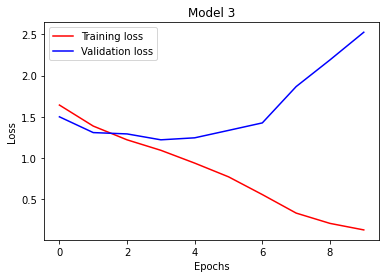

time: 197 ms (started: 2021-11-14 22:29:29 +00:00)


In [69]:
cnn_model.summary()
train_loss_cnn1 = cnn_model1.history['loss']
valid_loss_cnn1 = cnn_model1.history['val_loss']
plt.plot(train_loss_cnn1, 'r', label='Training loss')
plt.plot(valid_loss_cnn1, 'b', label='Validation loss')
plt.title('CNN Model 1') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()


In [71]:
best_model_cnn1 = keras.models.load_model("best_model_cnn1.hdf5")
score = best_model_cnn1.evaluate(train_images_cnn, X_train_label, verbose=0)
score1 = best_model_cnn1.evaluate(valid_images_cnn, X_valid_label, verbose=0)
print("Accuracy on Training Set", score[1], "\nAccuracy on Validation Set", score1[1])

Accuracy on Training Set 0.6369431018829346 
Accuracy on Validation Set 0.5408191680908203
time: 9.02 s (started: 2021-11-14 22:30:26 +00:00)


CNN Model -1:

*   Accuracy on the training dataset: 63%
*   Accuracy on the validation dataset:54%
*   Running time: 3min 17s
*   Parameters: 3 convolution layers, 2 max pooling layers, optimizer: adam, without dropout, without regularization
* The best model has been saved while training by monitoring the validation loss and the loss curve is plotted above. 





In [ ]:
checkpoint_cnn2 = ModelCheckpoint("best_model_cnn2.hdf5", monitor = 'val_loss', verbose = 1,
    save_best_only = True, mode =' min', period = 1)

In [38]:
#CNN Model 2: 4 conv layers, filter= 4, strides = 1, optimizer = rmsprop, with droput, without regularization
cnn_model2 = Sequential([Conv2D(96, kernel_size=4,strides = 1, activation='relu', input_shape=(48,48,1)), 
            Dropout(0.2),
            Conv2D(32, kernel_size=4, strides =1, activation='relu'), 
            Dropout(0.2),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=4,strides=1, activation='relu'),
            Dropout(0.2),
            Conv2D(64, kernel_size=4, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), 
            Flatten(),Dense(512, activation='relu'), Dense(7, activation='softmax'),])
print(cnn_model2.summary())  # Compare number of parameteres against FFN
cnn_model2.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'],)
cnn_model22 = cnn_model2.fit(train_images_cnn,X_train_label ,validation_data = (valid_images_cnn, X_valid_label), callbacks= [checkpoint_cnn2], epochs=10, batch_size=128,)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 45, 45, 96)        1632      
                                                                 
 dropout_3 (Dropout)         (None, 45, 45, 96)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 42, 42, 32)        49184     
                                                                 
 dropout_4 (Dropout)         (None, 42, 42, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 18, 18, 64)        32832     
                                                      

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 45, 45, 96)        1632      
                                                                 
 dropout_3 (Dropout)         (None, 45, 45, 96)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 42, 42, 32)        49184     
                                                                 
 dropout_4 (Dropout)         (None, 42, 42, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 18, 18, 64)        32832     
                                                      

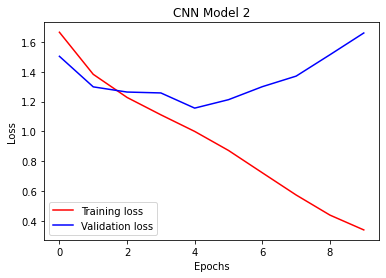

time: 212 ms (started: 2021-11-15 00:58:27 +00:00)


In [39]:
cnn_model2.summary()
train_loss_cnn2 = cnn_model22.history['loss']
valid_loss_cnn2 = cnn_model22.history['val_loss']
plt.plot(train_loss_cnn2, 'r', label='Training loss')
plt.plot(valid_loss_cnn2, 'b', label='Validation loss')
plt.title('CNN Model 2') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
best_model_cnn2 = keras.models.load_model("best_model_cnn2.hdf5")
score = best_model_cnn2.evaluate(train_images_cnn, X_train_label, verbose=0)
score1 = best_model_cnn2.evaluate(valid_images_cnn, X_valid_label, verbose=0)
print("Accuracy on Training Set", score[1], "\nAccuracy on Validation Set", score1[1])

Accuracy on Training Set 0.7036120891571045 
Accuracy on Validation Set 0.5720256567001343
time: 11 s (started: 2021-11-15 00:58:32 +00:00)


CNN Model -2:

*   Accuracy on the training dataset: 70%
*   Accuracy on the validation dataset:57%
*   Running time: 4min 23s
*   Parameters: 4 conv layers, filter= 4, strides = 1, optimizer = rmsprop, with droput, without regularization
* The best model has been saved while training by monitoring the validation loss and the loss curve is plotted above. 





In [92]:
checkpoint_cnn3 = ModelCheckpoint("best_model_cnn3.hdf5", monitor = 'val_loss', verbose = 1,
    save_best_only = True, mode =' min', period = 1)

time: 6.92 ms (started: 2021-11-14 23:09:00 +00:00)


In [95]:
#CNN Model 3: 1, filter= 4, stride = 1, optimizer = adam, dense 256, with regularization
cnn_model3 = Sequential([Conv2D(96, kernel_size=4, strides = 1,kernel_regularizer=l2(0.01),  activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=4, strides = 1, kernel_regularizer=l2(0.01), activation='relu'),  
            Dropout(0.25),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=4, strides= 1, kernel_regularizer=l2(0.01), activation='relu'),
            Conv2D(64, kernel_size=4, strides = 1, kernel_regularizer=l2(0.01),activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), 
            Flatten(),Dense(256, activation='relu'), Dense(7, activation='softmax'),])
print(cnn_model3.summary())  # Compare number of parameteres against FFN
cnn_model3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)
cnn_model33 = cnn_model3.fit(train_images_cnn,X_train_label, validation_data = (valid_images_cnn, X_valid_label),  callbacks = [checkpoint_cnn3], epochs=10, batch_size=128,)
performance = cnn_model.evaluate(test_images_cnn, X_test_label)

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 45, 45, 96)        1632      
                                                                 
 conv2d_53 (Conv2D)          (None, 42, 42, 32)        49184     
                                                                 
 dropout_19 (Dropout)        (None, 42, 42, 32)        0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 21, 21, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 18, 18, 64)        32832     
                                                                 
 conv2d_55 (Conv2D)          (None, 15, 15, 64)        65600     
                                                     

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 45, 45, 96)        1632      
                                                                 
 conv2d_53 (Conv2D)          (None, 42, 42, 32)        49184     
                                                                 
 dropout_19 (Dropout)        (None, 42, 42, 32)        0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 21, 21, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 18, 18, 64)        32832     
                                                                 
 conv2d_55 (Conv2D)          (None, 15, 15, 64)        65600     
                                                     

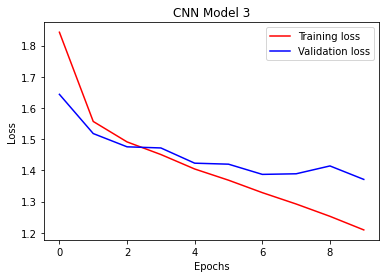

time: 225 ms (started: 2021-11-14 23:13:35 +00:00)


In [96]:
cnn_model3.summary()
train_loss_cnn3 = cnn_model33.history['loss']
valid_loss_cnn3 = cnn_model33.history['val_loss']
plt.plot(train_loss_cnn3, 'r', label='Training loss')
plt.plot(valid_loss_cnn3, 'b', label='Validation loss')
plt.title('CNN Model 3') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

In [98]:
best_model_cnn3 = keras.models.load_model("best_model_cnn3.hdf5")
score = best_model_cnn3.evaluate(train_images_cnn, X_train_label, verbose=0)
score1 = best_model_cnn3.evaluate(valid_images_cnn, X_valid_label, verbose=0)
print("Accuracy on Training Set", score[1], "\nAccuracy on Validation Set", score1[1])

Accuracy on Training Set 0.6187955141067505 
Accuracy on Validation Set 0.523265540599823
time: 11.1 s (started: 2021-11-14 23:13:57 +00:00)


CNN Model -3:

*   Accuracy on the training dataset: 61%
*   Accuracy on the validation dataset:52%
*   Running time: 3min 1s
*   Parameters: 4 conv layers, filter= 4, strides = 1, optimizer = rmsprop, with droput, without regularization
* The best model has been saved while training by monitoring the validation loss and the loss curve is plotted above. 





In [100]:
#Testing on the best CNN model
performance = best_model_cnn2.evaluate(test_images_cnn, X_test_label)

print("Accuracy on Test samples: {0}".format(performance[1]))

113/113 [==============================] - 1s 12ms/step - loss: 1.1435 - accuracy: 0.5890
Accuracy on Test samples: 0.5890220403671265
time: 2.64 s (started: 2021-11-14 23:15:36 +00:00)


**d.ii** Among the three CNN Models, model2 gives the best performance. So, we chose model1 and the test accuracy is 58.90%


In [41]:
#Bayesian optimization hyper parameter tuning
import tensorflow as tf
#importing keras from tensorflow
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(48,48,1)),
    # adding second convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    #adding 1st Maxpooling
    keras.layers.MaxPooling2D(
        pool_size=hp.Choice('pool_2_kernel', values = [2,4]), 
        strides=(2,2), 
        padding='same'),
    # adding third convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    #adding 4th conv layer
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    #adding 2nd Maxpooling
    keras.layers.MaxPooling2D(
        pool_size=hp.Choice('pool_2_kernel', values = [2,4]), 
        strides=(2,2), 
        padding='same'),    
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(7, activation='softmax')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])   
    return model

time: 69.2 ms (started: 2021-11-15 00:59:19 +00:00)


In [42]:
# HyperBand algorithm from keras tuner
import kerastuner as kt
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials = 4,
    overwrite = True
)
tuner.search(train_images_cnn, X_train_label, validation_data =(valid_images_cnn, X_valid_label)  ,epochs=10)


Trial 4 Complete [00h 03m 23s]
val_accuracy: 0.5497353076934814

Best val_accuracy So Far: 0.5497353076934814
Total elapsed time: 00h 13m 55s
INFO:tensorflow:Oracle triggered exit
time: 13min 56s (started: 2021-11-15 00:59:24 +00:00)


In [109]:
print(tuner.get_best_models()[0].summary())
print(tuner.get_best_hyperparameters()[0].values)

model = tuner.get_best_models(num_models=1)[0]
print (model.summary())
# Evaluate the best model.
loss, accuracy = model.evaluate(test_images_cnn, X_test_label)
print('loss:', loss)
print('accuracy:', accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0

**e.** Using Bayesian Optimization, the model hyper parameters have been found to acieve the best performance. The test accuracy is 57%.

In [27]:
#Fine Tuning
#Model: 3 layers, without regularization
from keras.applications import vgg16
img_rows, img_cols = 48, 48

modelX  = vgg16.VGG16( weights= "imagenet", include_top = False, input_shape = (img_rows, img_cols, 3))

for layer in modelX.layers:
  layer.trainable = False

modelX.summary()

def layer_adder(bottom_model, num_classes):
  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024, activation="relu")(top_model)
  top_model = Dense(512, activation = "relu")(top_model)
  top_model = Dense(num_classes, activation="softmax")(top_model)
  return top_model

num_classes = 7
FC_Head = layer_adder(modelX, num_classes)
from keras.layers import Input 
modelY = Model(inputs = modelX.input, outputs = FC_Head)
print(modelY.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [28]:
checkpoint_ft1 = ModelCheckpoint("best_model_ft1.hdf5", monitor = 'val_loss', verbose = 1,
    save_best_only = True, mode =' min', period = 1)

time: 9.94 ms (started: 2021-11-15 00:41:32 +00:00)


In [29]:
modelY.compile(loss = "categorical_crossentropy", metrics= "accuracy", optimizer=Adam(learning_rate= 0.001),)
train_images_cnn = X_train.reshape(28709,48,48)
valid_images_cnn = X_valid.reshape(3589,48,48)
test_images_cnn = X_test.reshape(3589, 48, 48)

#print(train_images_cnn.shape)  # (64, 224, 224)
rgb_batch_train = np.repeat(train_images_cnn[..., np.newaxis], 3, -1)
#print(rgb_batch_train.shape)  # (64, 224, 224, 3)

#print(valid_images_cnn.shape)  # (64, 224, 224)
rgb_batch_valid = np.repeat(valid_images_cnn[..., np.newaxis], 3, -1)
#print(rgb_batch_valid.shape)  # (64, 224, 224, 3)

#print(test_images_cnn.shape)  # (64, 224, 224)
rgb_batch_test = np.repeat(test_images_cnn[..., np.newaxis], 3, -1)
#print(rgb_batch_test.shape)  # (64, 224, 224, 3)

finetune1 = modelY.fit(rgb_batch_train, X_train_label, validation_data = (rgb_batch_valid, X_valid_label), callbacks = [checkpoint_ft1], epochs=10,)


Epoch 1/10
897/898 [============================>.] - ETA: 0s - loss: 1.6155 - accuracy: 0.3665
Epoch 00001: val_loss improved from inf to 1.57098, saving model to best_model_ft1.hdf5
898/898 [==============================] - 30s 32ms/step - loss: 1.6155 - accuracy: 0.3666 - val_loss: 1.5710 - val_accuracy: 0.3962
Epoch 2/10
897/898 [============================>.] - ETA: 0s - loss: 1.5231 - accuracy: 0.4100
Epoch 00002: val_loss improved from 1.57098 to 1.56487, saving model to best_model_ft1.hdf5
898/898 [==============================] - 28s 31ms/step - loss: 1.5231 - accuracy: 0.4101 - val_loss: 1.5649 - val_accuracy: 0.3951
Epoch 3/10
897/898 [============================>.] - ETA: 0s - loss: 1.4639 - accuracy: 0.4347
Epoch 00003: val_loss improved from 1.56487 to 1.49464, saving model to best_model_ft1.hdf5
898/898 [==============================] - 28s 31ms/step - loss: 1.4640 - accuracy: 0.4347 - val_loss: 1.4946 - val_accuracy: 0.4369
Epoch 4/10
897/898 [=====================

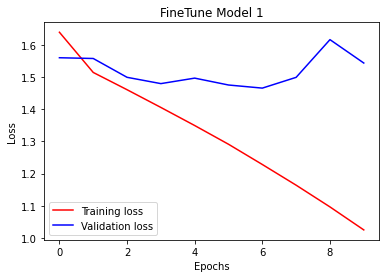

time: 199 ms (started: 2021-11-15 00:40:49 +00:00)


In [26]:
train_loss_ft1 = finetune1.history['loss']
valid_loss_ft1 = finetune1.history['val_loss']
plt.plot(train_loss_ft1, 'r', label='Training loss')
plt.plot(valid_loss_ft1, 'b', label='Validation loss')
plt.title('FineTune Model 1') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

In [119]:
best_model_ft1 = keras.models.load_model("best_model_ft1.hdf5")
score = best_model_ft1.evaluate(rgb_batch_train , X_train_label, verbose=0)
score1 = best_model_ft1.evaluate(rgb_batch_valid , X_valid_label, verbose=0)
print("Accuracy on Training Set", score[1], "\nAccuracy on Validation Set", score1[1])

Accuracy on Training Set 0.5374273061752319 
Accuracy on Validation Set 0.4563945531845093
time: 28.5 s (started: 2021-11-15 00:03:01 +00:00)


Fine Tuning: Model 1:  Fine Tuning on the VGG16 model with three Dense layers at the top and without regularization. The accuracy on the validation set is 45% 

In [120]:
checkpoint_ft2 = ModelCheckpoint("best_model_ft2.hdf5", monitor = 'val_loss', verbose = 1,
    save_best_only = True, mode =' min', period = 1)

time: 7.91 ms (started: 2021-11-15 00:03:51 +00:00)


In [121]:
#Model 2: add regularization, less layer

def layer_adder2(bottom_model, num_classes):
  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(512, kernel_regularizer=l2(0.01), activation = "relu")(top_model)
  top_model = Dense(num_classes, activation="softmax")(top_model)
  return top_model

num_classes = 7
FC_Head2 = layer_adder(modelX, num_classes)
modelZ = Model(inputs = modelX.input, outputs = FC_Head2)
print(modelZ.summary())

modelZ.compile(loss = "categorical_crossentropy", metrics= "accuracy", optimizer= "adam")
finetune2 = modelZ.fit(rgb_batch_train, X_train_label, validation_data = (rgb_batch_valid, X_valid_label), callbacks = [checkpoint_ft2] ,epochs=10,batch_size=256,)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

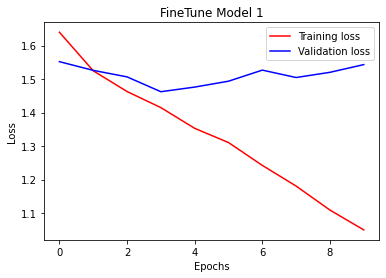

time: 191 ms (started: 2021-11-15 00:07:23 +00:00)


In [122]:
train_loss_ft2 = finetune2.history['loss']
valid_loss_ft2 = finetune2.history['val_loss']
plt.plot(train_loss_ft2, 'r', label='Training loss')
plt.plot(valid_loss_ft2, 'b', label='Validation loss')
plt.title('FineTune Model 1') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()

In [123]:
best_model_ft2 = keras.models.load_model("best_model_ft2.hdf5")
score = best_model_ft2.evaluate(rgb_batch_train, X_train_label, verbose=0)
score1 = best_model_ft2.evaluate(rgb_batch_valid, X_valid_label, verbose=0)
print("Accuracy on Training Set", score[1], "\nAccuracy on Validation Set", score1[1])

Accuracy on Training Set 0.5026646852493286 
Accuracy on Validation Set 0.44524937868118286
time: 27.6 s (started: 2021-11-15 00:07:29 +00:00)


Fine Tuning: Model 2:  Fine Tuning on the VGG16 model with 2 Dense layers at the top and with regularization. The accuracy on the validation set is 44% 

In [124]:
performance = best_model_ft1.evaluate(rgb_batch_test, X_test_label, verbose=0)

print("Accuracy on Test samples: {0}".format(performance[1]))

Accuracy on Test samples: 0.4435775876045227
time: 5.3 s (started: 2021-11-15 00:08:27 +00:00)


f. Among the different hyperparameter combinations for Fine Tuning, model1 has achieved best performance. The test accuracy with model2 is 44%.

In [52]:
checkpoint_daug = ModelCheckpoint("best_model_daug.hdf5", monitor = 'val_loss', verbose = 1,
    save_best_only = True, mode =' min', period = 1)

time: 11.2 ms (started: 2021-11-15 01:32:42 +00:00)


In [53]:
#Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, 
                             width_shift_range=0.2,height_shift_range=0.2,
                             horizontal_flip=True)

cnn_model2.fit(datagen.flow(train_images_cnn, X_train_label), validation_data = (valid_images_cnn, X_valid_label),callbacks=[checkpoint_daug], epochs=10)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
898/898 [==============================] - ETA: 0s - loss: 1.7679 - accuracy: 0.2701
Epoch 00001: val_loss improved from inf to 1.64913, saving model to best_model_daug.hdf5
898/898 [==============================] - 33s 35ms/step - loss: 1.7679 - accuracy: 0.2701 - val_loss: 1.6491 - val_accuracy: 0.3427
Epoch 2/10
897/898 [============================>.] - ETA: 0s - loss: 1.6339 - accuracy: 0.3497
Epoch 00002: val_loss improved from 1.64913 to 1.45561, saving model to best_model_daug.hdf5
898/898 [==============================] - 31s 35ms/step - loss: 1.6341 - accuracy: 0.3495 - val_loss: 1.4556 - val_accuracy: 0.4480
Epoch 3/10
898/898 [==============================] - ETA: 0s - loss: 1.5184 - accuracy: 0.4096
Epoch 00003: val_loss improved from 1.45561 to 1.35654, saving model to best_model_daug.hdf5
898/898 [==============================] - 31s 35ms/step - loss: 1.5184 - accuracy: 0.4096 - val_loss: 1.3565 - val_accuracy: 0.4614
Epoch 4/10
898/898 [==================

time: 5min 13s (started: 2021-11-15 01:32:57 +00:00)


In [55]:
performance = best_model_daug.evaluate(test_images_cnn, X_test_label)

113/113 [==============================] - 2s 13ms/step - loss: 1.2090 - accuracy: 0.5391
time: 2.8 s (started: 2021-11-15 01:38:43 +00:00)


g. Using Data Augmentation, the accuracy of the CNN model is 54% on the testing dataset.

In [ ]:
#pip install keras-tuner